<a href="https://colab.research.google.com/github/soulsharp/Sampling_Algorithms_from_Scratch/blob/main/Rejection_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rejection Sampling** - This is a simple technique which allows us to draw samples from a probability distribution which is intractable or very difficult to compute in practice.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
num_of_points = 1000
start_value, end_value = -5, 6
x_values = np.linspace(start_value, end_value, num_of_points)
x_values = np.round(x_values, decimals=3)

First order of business is to create a function that forms the numerator of the PDF that we are going to sample from. We choose this function to be exponential and defined piece-wise from [start value, 0) and [0,end value].where start value is less than 0 and end value is greater than 0

Note : This function has been taken from the "Accept-Reject Sampling : Data Science Basics" by ritvikmath on YouTube

Link to the video : https://www.youtube.com/watch?v=OXDqjdVVePY

In [ ]:
# my_function forms the numerator of the pdf
def my_function(x_values):
    y_values = np.zeros_like(x_values)

    # Uses boolean masks for positive and negative values
    positive_mask = x_values >= 0
    negative_mask = ~positive_mask

    # Vectorized calculations for positive and negative values
    y_values[positive_mask] = np.exp(-x_values[positive_mask]/2) + np.exp(-x_values[positive_mask] ** 2)
    y_values[negative_mask] = np.exp(x_values[negative_mask]/3) + np.exp(x_values[negative_mask] ** 3)

    return y_values

f_x = my_function(x_values)

In [ ]:
# plot of the function
def my_plot(x_values, f_x):
  plt.figure()
  plt.plot(x_values, f_x)
  plt.show()

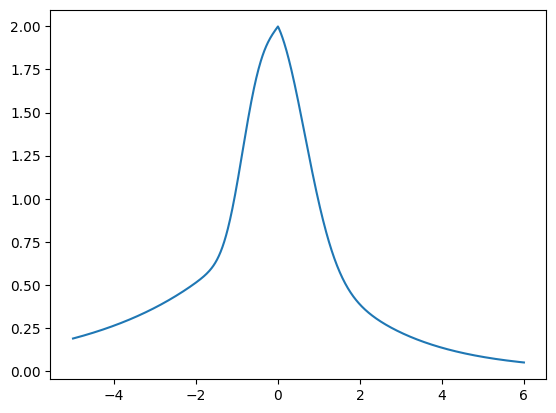

In [ ]:
my_plot(x_values, f_x)

We now assign a function g(x) that will later help us approximate drawing samples from the target distribution.The two criteria for choosing such a g are:

1) It should be easy to draw samples from g
2) g should have the same domain as f

Here we choose g to be gaussian

In [ ]:
def g(x_values, mean=0, std_dev=1):
  return np.exp((-((x_values-mean) / std_dev) ** 2) / 2) / (np.sqrt(2 * np.pi) * std_dev)

mean = 0
std_dev = 1
g_x = g(x_values, mean, std_dev)

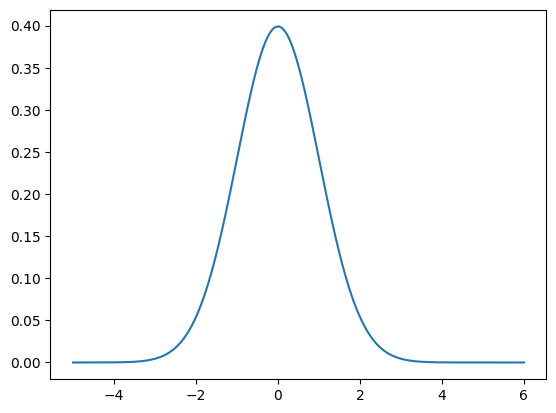

In [ ]:
my_plot(x_values, g_x)

In [ ]:
# A handy function to plot two functions with the same domain on a graph

def compare_f_and_g(x_values, g_x, f_x):
  plt.figure()
  plt.plot(x_values, g_x, color='red', label='g(x)')
  plt.plot(x_values, f_x, color='blue', label='f(x)')
  plt.title("A comparison b/w f and g")
  plt.legend()
  plt.show()

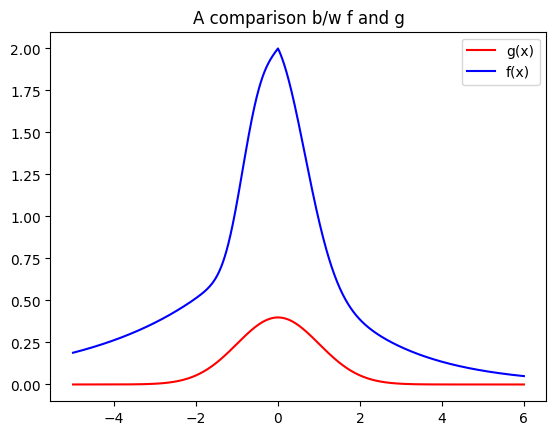

In [ ]:
compare_f_and_g(x_values, g_x, f_x)

In [ ]:
if False in (g_x < f_x) :
  print(False)
else:
  print(True)

True


We notice that g < f for the entire domain.
Therefore, g must be scaled by M such that M*g > f for the entire domain.
We pick M = 6

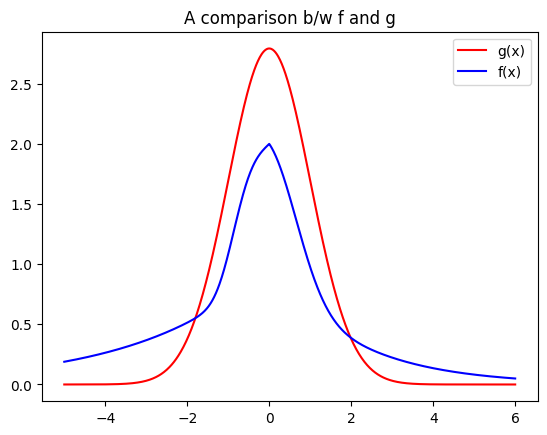

In [ ]:
M = 7
# f and g for scaled g
compare_f_and_g(x_values, M * g_x, f_x)

We restrict the domain to points where Mg>f for illustration.**This step is not performed in practice**.
In practice, one of the drawbacks of Rejection sampling is difficulty in obtaining an M such that Mg>f.

In [ ]:
# Clips x to find domain where M
def clip_domain(x_values, f_x, g_x):
  seq = g_x > f_x

  # first and last indices where g_x < f_x
  first_idx = None
  last_idx = None
  for i in range(num_of_points):
    if seq[i] == True:
      if first_idx == None:
        first_idx = i
      last_idx = i

  # redefine the domain to where g_x > f_x and return it

  return x_values[first_idx:last_idx],f_x[first_idx:last_idx], g_x[first_idx:last_idx]

**Note : The clip_domain function defined here works only when there exists xlow and xhigh such that for all x < xlow and x > xhigh, f(x)>g(x)**

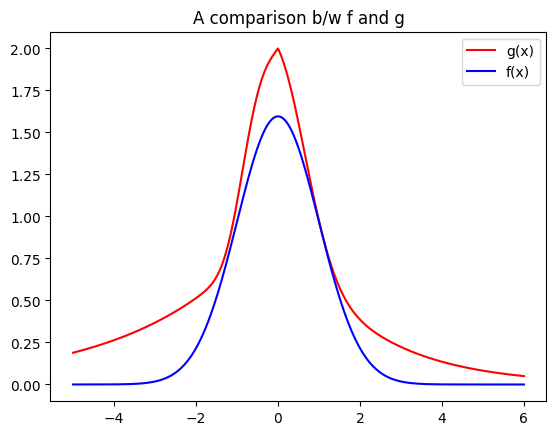

In [ ]:
# f and g after domain clipping
a, b, c = clip_domain(x_values, f_x, 4 * g_x)
compare_f_and_g(a, b, c)

In [ ]:
# Takes in valid xs, functions f_x, g_x, the scaling factor M and no of points to be used for sampling
# Returns an array of accepted sample values
def rejection_sampling(x_values, f_x, g_x, M=6, num_of_points=1000):

  # randomly selects num_of_points number of xs from the clipped domain
  random_x = np.random.uniform(x_values[0], x_values[len(x_values)-1], num_of_points)

  # samples x from the standard normal distribution g_x
  g_x_prime = g_x(random_x)

  # gets f_x corresponding to random_x
  f_x_prime = f_x(random_x)

  # calculates the acceptance probability
  acceptance_probs = f_x_prime / (M * g_x_prime)

  # randomly picks num_of_points nos between 0 and 1
  random_probs = np.random.uniform(0, 1, num_of_points)

  # With respective acceptance probs accept the sample
  accept_x_idx = random_probs > acceptance_probs
  accepted_x = random_x[accept_x_idx]

  return accepted_x

x_vals, _, _ = clip_domain(x_values, my_function(x_values), g(x_values))
print(f"The accepted samples are \n\n {rejection_sampling(x_vals, my_function, g, 6, 1000)}")

The accepted samples are 

 [-0.72495508  1.3922441  -0.8845082   1.38443234  1.67624546  1.25860779
 -0.03430477  1.45968781 -1.03639767 -0.69191947  1.41795918  0.83408684
  1.38711818  0.68764032 -1.09113352  1.72570638 -0.59534824 -1.28337099
  1.09747076  1.15722213  0.45057849  0.88384705  0.94581654  0.85630713
 -1.10547881 -0.97812502  1.34147397 -1.16519933  0.50982405 -0.25222925
 -0.7999858   1.04127805  0.68984132  1.49157081  1.75361956 -0.1385358
  1.37443208 -0.10146004  1.15675917 -0.27269334 -1.48891402 -1.19622986
 -0.12906152 -0.05471759  1.14832505 -0.20258899  1.23591082  0.50012588
  0.5147334   1.51627091  1.15796188  0.3423389   1.08027515  0.6415887
  0.77044038 -0.03549924  1.33028009  0.19015695 -0.78561877  1.00519043
  1.61554958 -1.62242182  1.39850836  0.42794379 -0.60048793  0.17930016
  1.2533515  -1.34369689  0.80737657  0.5691188   1.43419612 -0.80255902
  1.53650743  0.85731103  0.40096173  0.64783485  1.24503393  0.9964892
  0.54072392 -0.437348   -